# Data Science Basics - Learning Curve - Complete Guide

When building machine learning models, we want to keep error as low as possible. That’s a key skill for anyone aiming to learn Python for data science. Two major sources of error are bias and variance. If we managed to reduce these two, then we could build more accurate models.

But how do we diagnose bias and variance in the first place? And what actions should we take once we’ve detected something?

A learning model of a Machine Learning model shows how the error in the prediction of a Machine Learning model changes as the size of the training set increases or decreases.
Before we continue, we must first understand what variance and bias mean in the Machine Learning model.

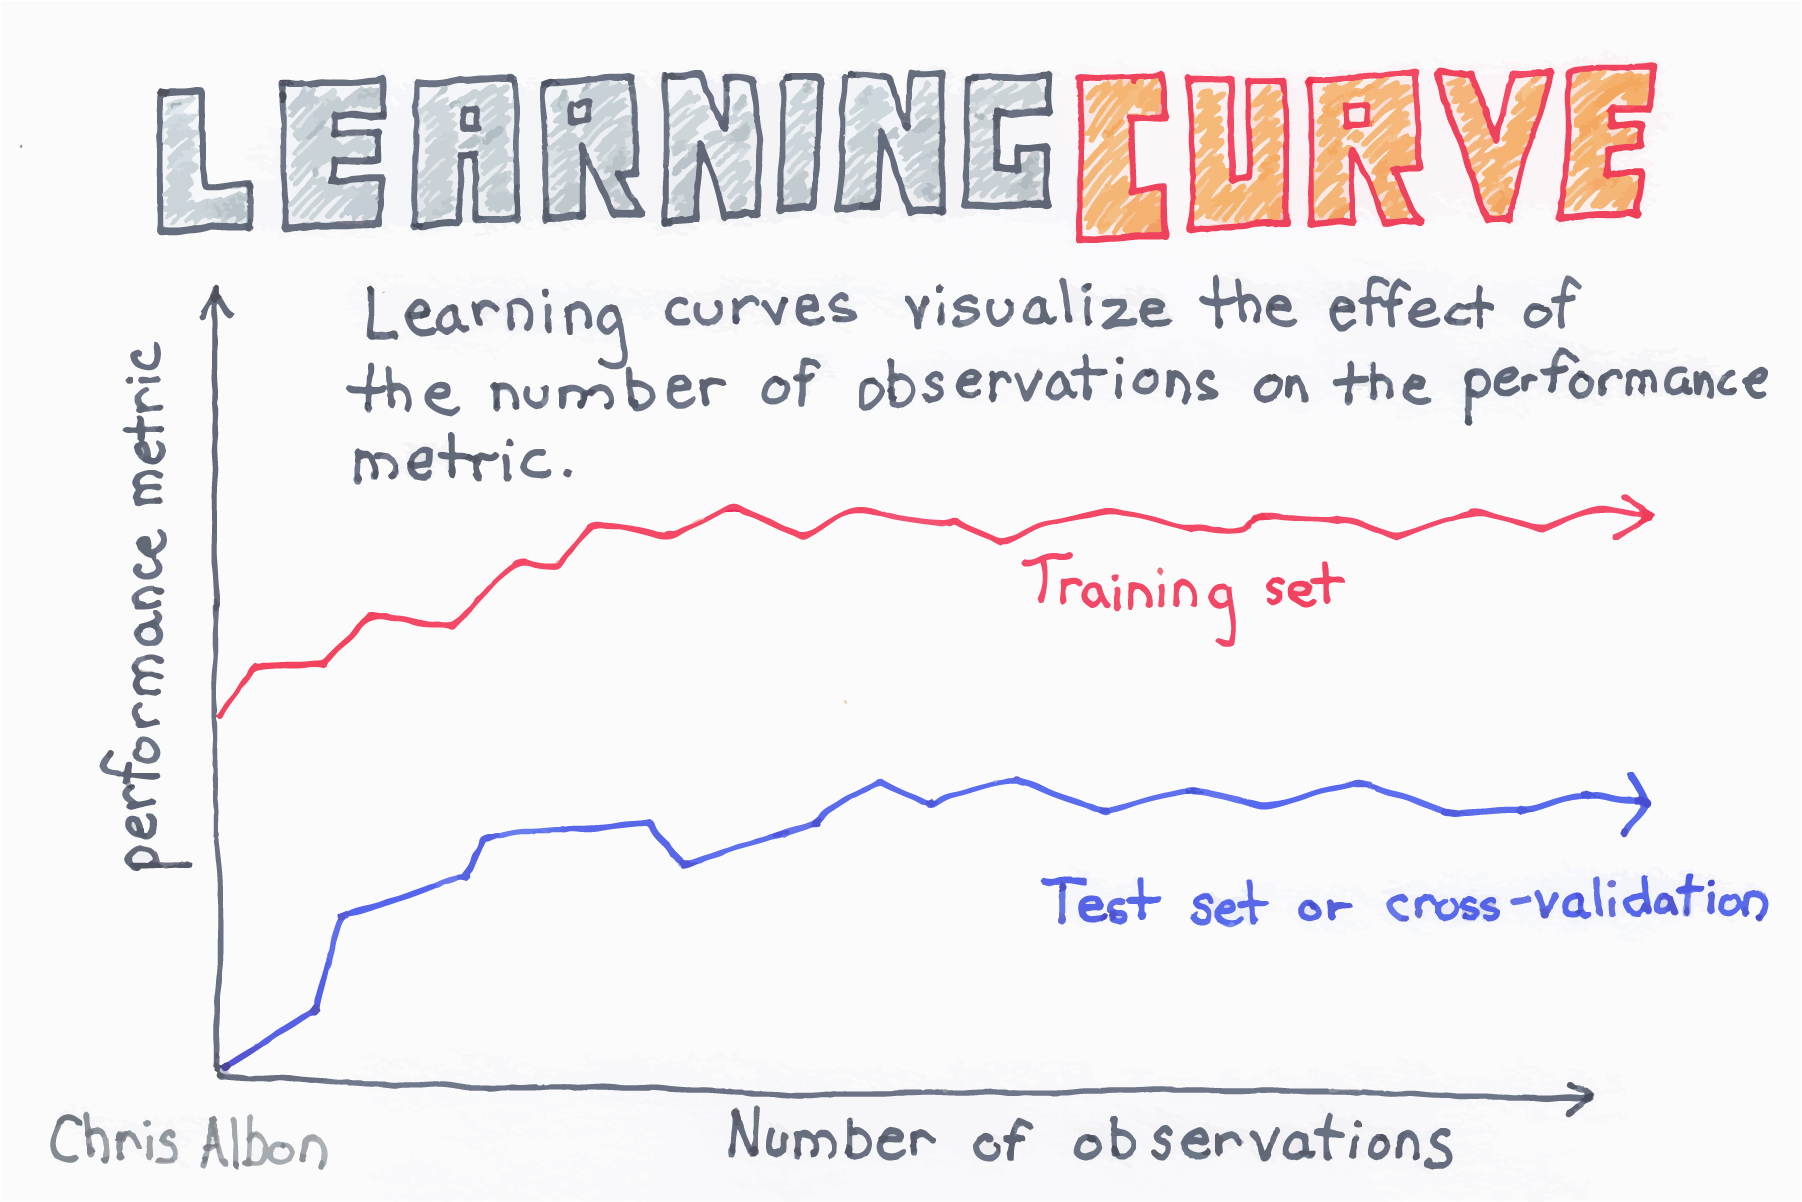

#### Bias:
It is basically nothing but the difference between the average prediction of a model and the correct value of the prediction. Models with high bias make a lot of assumptions about the training data. This leads to over-simplification of the model and may cause a high error on both the training and testing sets. However, this also makes the model faster to learn and easy to understand. Generally, linear model algorithms like Linear Regression have a high bias.

#### Variance:
It is the amount a model’s prediction will change if the training data is changed. Ideally, a machine learning model should not vary too much with a change in training sets i.e., the algorithm should be good at picking up important details about the data, regardless of the data itself. Example of algorithms with high variance is Decision Trees, Support Vector Machines (SVM).

Ideally, we would want a model with low variance as well as low bias. To achieve lower bias, we need more training data but with higher training data, the variance of the model will increase. So, we have to strike a balance between the two. 

#### This is called the bias-variance trade-off.

A learning curve can help to find the right amount of training data to fit our model with a good bias-variance trade-off. This is why learning curves are so important.
Now that we understand the bias-variance trade-off and why a learning curve is important, we will now learn how to use learning curves in Python using the scikit-learn library of Python.

In supervised learning, we assume there’s a real relationship between feature(s) and target and estimate this unknown relationship with a model. Provided the assumption is true, there really is a model, which we’ll call "f", which describes perfectly the relationship between features and target.

In practice, "f" is almost always completely unknown, and we try to estimate it with a model "f^" (notice the slight difference in notation between "f" and "f^"). We use a certain training set and get a certain "f^". If we use a different training set, we are very likely to get a different "f^". As we keep changing training sets, we get different outputs for "f^". The amount by which "f^" varies as we change training sets is called variance.

To estimate the true , we use different methods, like linear regression or random forests. Linear regression, for instance, assumes linearity between features and target. For most real-life scenarios, however, the true relationship between features and target is complicated and far from linear. Simplifying assumptions give bias to a model. The more erroneous the assumptions with respect to the true relationship, the higher the bias, and vice-versa.

Generally, a model  will have some error when tested on some test data. It can be shown mathematically that both bias and variance can only add to a model’s error. We want a low error, so we need to keep both bias and variance at their minimum. However, that’s not quite possible. There’s a trade-off between bias and variance.

A low-biased method fits training data very well. If we change training sets, we’ll get significantly different models "f^".

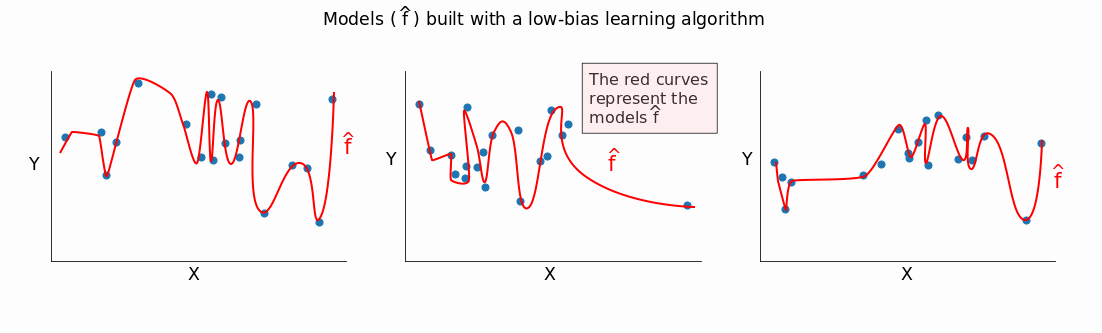

You can see that a low-biased method captures most of the differences (even the minor ones) between the different training sets.  varies a lot as we change training sets, and this indicates high variance.

The less biased a method, the greater its ability to fit data well. The greater this ability, the higher the variance. Hence, the lower the bias, the greater the variance.

The reverse also holds: the greater the bias, the lower the variance. A high-bias method builds simplistic models that generally don’t fit well training data. As we change training sets, the models  we get from a high-bias algorithm are, generally, not very different from one another.

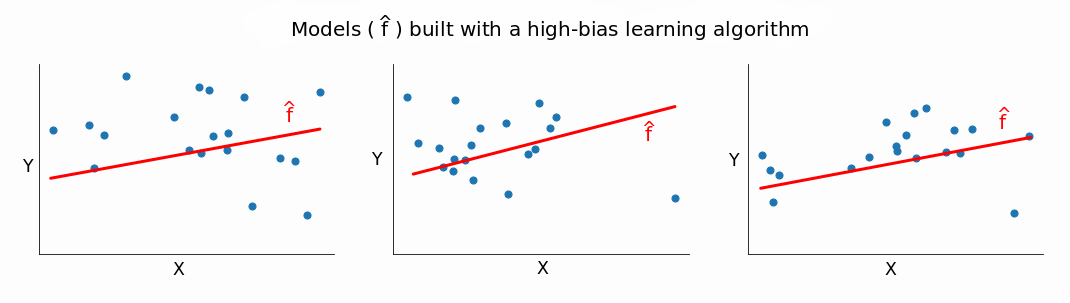

If "f" doesn’t change too much as we change training sets, the variance is low, which proves our point: the greater the bias, the lower the variance.

In practice, however, we need to accept a trade-off. We can’t have both low bias and low variance, so we want to aim for something in the middle.

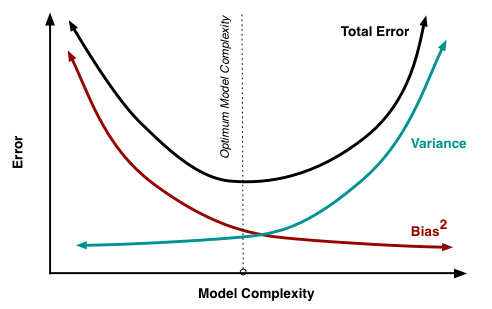

We’ll try to build some practical intuition for this trade-off as we generate and interpret learning curves below.

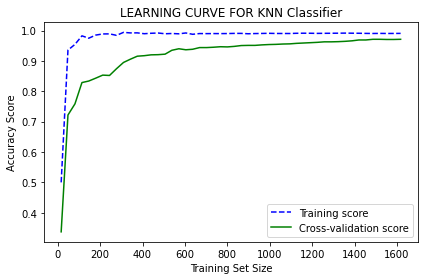

In [1]:
#Importing Required Libraries and Modules 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_digits 
from sklearn.model_selection import learning_curve 
  
# Load data set 
dataset = load_digits() 
  
# X contains data and y contains labels 
X, y = dataset.data, dataset.target 
  
# Obtain scores from learning curve function 
# cv is the number of folds while performing Cross Validation 
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50)) 
  
# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR KNN Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve converge. The cross-validation accuracy increases as we add more training data. So adding training data is useful in this case. Since the training score is very accurate, this indicates low bias and high variance. So this model also begins overfitting the data because the cross-validation score is relatively lower and increases very slowly as the size of the training set increases.

#### Conclusion:
Learning Curves are a great diagnostic tool to determine bias and variance in a supervised machine learning algorithm. In this article, we have learnt what learning curves and how they are implemented in Python.